<a href="https://colab.research.google.com/github/mobarakol/DARES_MedICSS2024/blob/main/finding_image_similarity_afsfmlearner_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Endovis 2018

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/DARES/AF-SfMLearner

/content/drive/MyDrive/DARES/AF-SfMLearner


In [15]:
from __future__ import absolute_import, division, print_function

import os
import cv2
import numpy as np

import torch
from torch.utils.data import DataLoader

from layers import disp_to_depth
from utils import readlines
from options import MonodepthOptions
import datasets
import networks
from skimage.metrics import structural_similarity as ssim

data_path = '/content/drive/MyDrive/DARES/SCARED_Images_Resized'
filenames = readlines('/content/drive/MyDrive/DARES/AF-SfMLearner/splits/endovis/test_files.txt')
dataset = datasets.SCAREDRAWDataset(data_path, filenames,
                                           256,320,
                                           [0], 4, is_train=False)

dataloader = DataLoader(dataset, 16, shuffle=False, num_workers=2,
                        pin_memory=True, drop_last=False)

imageA = cv2.imread('/content/drive/MyDrive/DARES/paper_imgs/img1.png') #cropped and upload the image from paper as name img.png
imageA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
imageA = cv2.resize(imageA, (320,256))
ssim_all = []
img_path_all = []

for data in dataset:
  input_color = data[("color", 0, 0)]
  # print(data.keys())
  imageB = cv2.cvtColor(input_color.permute(1,2,0).numpy(), cv2.COLOR_BGR2GRAY)
  # print(imageB.shape, imageA.shape)
  s = ssim(imageA, imageB)
  ssim_all.append(s)
  img_path_all.append('sequence:{}, keyframe:{}, frame_id:{}'.format(data['sequence'], data['keyframe'],data['frame_id']))
  if s >= .9:
    print(data['sequence'], data['keyframe'],data['frame_id'],)

sorted_idx = np.array(ssim_all).argsort()[::-1]
print('best match 1:', ssim_all[sorted_idx[0]], ' Path:', img_path_all[sorted_idx[0]])
print('best match 2:', ssim_all[sorted_idx[1]], ' Path:', img_path_all[sorted_idx[1]])

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


best match 1: 0.005227970228529841  Path: sequence:2, keyframe:4, frame_id:1408
best match 2: 0.005080385254315208  Path: sequence:2, keyframe:4, frame_id:853


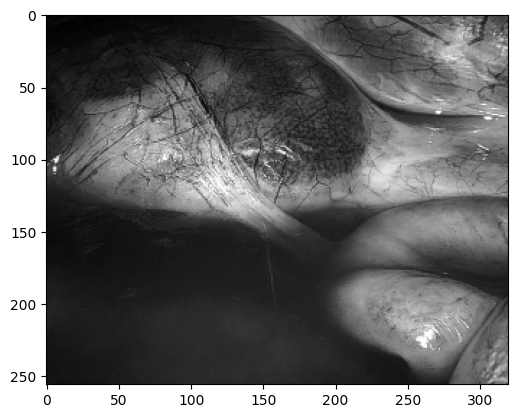

In [26]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(imageB, cv2.COLOR_RGB2BGR))

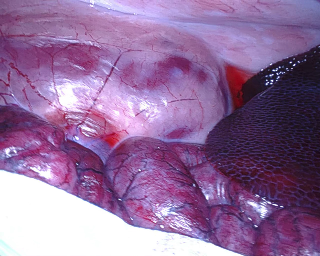

In [20]:
from PIL import Image
path = '/content/drive/MyDrive/DARES/SCARED_Images_Resized/dataset2/keyframe4/image_02/data/0000000853.png'
Image.open(path)

In [24]:
imageA = cv2.imread('/content/drive/MyDrive/DARES/paper_imgs/img2.png') #cropped and upload the image from paper as name img.png
imageA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
imageA = cv2.resize(imageA, (320,256))
ssim_all = []
img_path_all = []

for data in dataset:
  input_color = data[("color", 0, 0)]
  # print(data.keys())
  imageB = cv2.cvtColor(input_color.permute(1,2,0).numpy(), cv2.COLOR_BGR2GRAY)
  # input_color.permute(1,2,0).numpy()
  # print(imageB.shape, imageA.shape)
  s = ssim(imageA, imageB)
  ssim_all.append(s)
  img_path_all.append('sequence:{}, keyframe:{}, frame_id:{}'.format(data['sequence'], data['keyframe'],data['frame_id']))
  if s >= .9:
    print(data['sequence'], data['keyframe'],data['frame_id'],)

sorted_idx = np.array(ssim_all).argsort()[::-1]
print('best match 1:', ssim_all[sorted_idx[0]], ' Path:', img_path_all[sorted_idx[0]])
print('best match 2:', ssim_all[sorted_idx[1]], ' Path:', img_path_all[sorted_idx[1]])

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


best match 1: 0.005657578817573775  Path: sequence:5, keyframe:4, frame_id:160
best match 2: 0.005652847418098073  Path: sequence:5, keyframe:4, frame_id:156


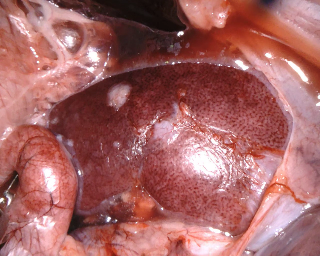

In [22]:
from PIL import Image
path = '/content/drive/MyDrive/DARES/SCARED_Images_Resized/dataset5/keyframe4/image_02/data/0000000156.png'
Image.open(path)

In [17]:
!ls /content/drive/MyDrive/DARES/SCARED_Images_Resized/dataset2/keyframe4/image_02/data

0000000001.png	0000000354.png	0000000707.png	0000001060.png	0000001413.png	0000001766.png
0000000002.png	0000000355.png	0000000708.png	0000001061.png	0000001414.png	0000001767.png
0000000003.png	0000000356.png	0000000709.png	0000001062.png	0000001415.png	0000001768.png
0000000004.png	0000000357.png	0000000710.png	0000001063.png	0000001416.png	0000001769.png
0000000005.png	0000000358.png	0000000711.png	0000001064.png	0000001417.png	0000001770.png
0000000006.png	0000000359.png	0000000712.png	0000001065.png	0000001418.png	0000001771.png
0000000007.png	0000000360.png	0000000713.png	0000001066.png	0000001419.png	0000001772.png
0000000008.png	0000000361.png	0000000714.png	0000001067.png	0000001420.png	0000001773.png
0000000009.png	0000000362.png	0000000715.png	0000001068.png	0000001421.png	0000001774.png
0000000010.png	0000000363.png	0000000716.png	0000001069.png	0000001422.png	0000001775.png
0000000011.png	0000000364.png	0000000717.png	0000001070.png	0000001423.png	0000001776.png
0000000012

In [ ]:
from skimage.metrics import structural_similarity as ssim
import cv2
from glob import glob
img_path = glob ('/content/drive/MyDrive/DARES/SCARED_Images_Resized/*/*/image_02/data/*.png')

print('Total imgs:', len(img_path))
imageA = cv2.imread('/content/drive/MyDrive/DARES/paper_imgs/img1.png') #cropped and upload the image from paper as name img.png
imageA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
imageA = cv2.resize(imageA, (224,224))

for path in img_path:
    imageB = cv2.imread(path)
    imageB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    imageB = cv2.resize(imageB, (224, 224))
    s = ssim(imageA, imageB)
    if s >= .9:
        print(path)


Total imgs: 28857


Append list

In [ ]:
from skimage.metrics import structural_similarity as ssim
import cv2
from glob import glob
import numpy as np
img_path_all = glob ('/content/drive/MyDrive/DARES/SCARED_Images_Resized/*/*/image_02/data/*.png')
paper_img_path_all = glob('/content/drive/MyDrive/DARES/paper_imgs/*.png')

for paper_img_path in paper_img_path_all:

    print('Paper image:', paper_img_path)
    imageA = cv2.imread(paper_img_path) #cropped and upload the image from paper as name img.png
    imageA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    imageA = cv2.resize(imageA, (24,24))
    ssim_all = []
    for img_path in img_path_all:
        imageB = cv2.imread(img_path)
        imageB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
        imageB = cv2.resize(imageB, (24, 24))
        s = ssim(imageA, imageB)
        ssim_all.append(s)
        # if s >= .9:
        #     print(img_path)
    sorted_idx = np.array(ssim_all).argsort()[::-1]
    print('best match 1:', ssim_all[sorted_idx[0]], ' Path:', img_path_all[sorted_idx[0]])
    print('best match 2:', ssim_all[sorted_idx[1]], ' Path:', img_path_all[sorted_idx[1]])

Paper image: /content/paper_fig/img5.png
best match 1: 0.3468168106885421  Path: endovis18/seq_6/left_frames/frame117.png
best match 2: 0.33931758295432235  Path: endovis18/seq_15/left_frames/frame106.png
Paper image: /content/paper_fig/img3.png
best match 1: 0.3007221609290306  Path: endovis18/seq_4/left_frames/frame094.png
best match 2: 0.2599373316133494  Path: endovis18/seq_3/left_frames/frame135.png
Paper image: /content/paper_fig/img1.png
best match 1: 0.972921409270982  Path: endovis18/seq_5/left_frames/frame029.png
best match 2: 0.6889995415171442  Path: endovis18/seq_5/left_frames/frame028.png
Paper image: /content/paper_fig/img8.png
best match 1: 0.25414857451348455  Path: endovis18/seq_6/left_frames/frame080.png
best match 2: 0.2396823007672693  Path: endovis18/seq_5/left_frames/frame077.png
Paper image: /content/paper_fig/img17.png
best match 1: 0.26614651879432777  Path: endovis17/instrument_dataset_10/images/frame011.png
best match 2: 0.2647758203013191  Path: endovis18/s

Using OpenCLIP

In [ ]:
!pip -q install git+https://github.com/openai/CLIP.git
!pip -q install open_clip_torch
!pip -q install sentence_transformers

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 928.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 97.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.7 MB/s eta 0:00:00


In [ ]:
import torch
import open_clip
import cv2
from sentence_transformers import util
from PIL import Image
import cv2

# Load images
img_path = '/content/drive/MyDrive/DARES/paper_imgs/img1.png'
# image1 = cv2.imread(img_path)
# image2 = cv2.imread(img_path)
# image1 = cv2.resize(image1, (24, 24))
# image2 = cv2.resize(image2, (24, 24))
# image processing model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-16-plus-240', pretrained="laion400m_e32")
model.to(device)
def imageEncoder(img):
    img1 = Image.fromarray(img).convert('RGB')
    img1 = preprocess(img1).unsqueeze(0).to(device)
    img1 = model.encode_image(img1)
    return img1
def generateScore(image1, image2):
    test_img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    data_img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    img1 = imageEncoder(test_img)
    img2 = imageEncoder(data_img)
    cos_scores = util.pytorch_cos_sim(img1, img2)
    score = round(float(cos_scores[0][0])*100, 2)
    return score


print(f"similarity Score: ", round(generateScore(img_path, img_path), 2))

similarity Score:  100.0


In [ ]:
from torch.utils.data import Dataset, DataLoader
from glob import glob
import numpy as np
from sentence_transformers import util

class ImageDataset(Dataset):
    def __init__(self, root_paths =None, transform=None):
        self.img_path_all = []
        for root_path in root_paths:
            self.img_path_all.extend(glob (root_path))
        self.transform = transform

    def __len__(self):
        return len(self.img_path_all)

    def __getitem__(self, i):
        img = Image.open(self.img_path_all[i]).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img, self.img_path_all[i]

# def main():


device = "cuda" if torch.cuda.is_available() else "cpu"
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-16-plus-240', pretrained="laion400m_e32")
model.to(device)
root_paths = ['/content/drive/MyDrive/DARES/SCARED_Images_Resized/*/*/image_02/data/*.png']
paper_root_paths = ['/content/drive/MyDrive/DARES/paper_imgs/*.png']
img_dataset = ImageDataset(root_paths=root_paths, transform=preprocess)
paper_img_dataset = ImageDataset(root_paths=paper_root_paths, transform=preprocess)

img_dataloader = DataLoader(dataset=img_dataset, batch_size=80, shuffle=False, num_workers=2)
paper_img_dataloader = DataLoader(dataset=paper_img_dataset, batch_size=20, shuffle=False, num_workers=2)

paper_paths_all = []
with torch.no_grad():
    for paper_imgs, paper_paths in paper_img_dataloader:
        paper_img_batch = paper_imgs.to(device)
        paper_img_features = model.encode_image(paper_img_batch)
        paper_paths_all.extend(paper_paths)

    for paper_img_feat, paper_img_path in zip(paper_img_features, paper_paths_all):
        print('Paper image:', paper_img_path)
        clip_score_all = []
        paths_all = []
        for img_batch, paths in img_dataloader:
            img_batch = img_batch.to(device)
            feature_batch = model.encode_image(img_batch)
            paths_all.extend(paths)
            # for feature in feature_batch:
            cos_scores = util.pytorch_cos_sim(feature_batch, paper_img_feat)
            score = cos_scores[:,0].cpu().numpy().round(2)
            clip_score_all.extend(score)

        sorted_idx = np.array(clip_score_all).argsort()[::-1]
        print('best match 1:', clip_score_all[sorted_idx[0]], ' Path:', paths_all[sorted_idx[0]])
        print('best match 2:', clip_score_all[sorted_idx[1]], ' Path:', paths_all[sorted_idx[1]])

    print(feature_batch.shape)


Paper image: /content/paper_fig/img5.png
best match 1: 0.95  Path: endovis18/seq_6/left_frames/frame002.png
best match 2: 0.95  Path: endovis17/instrument_dataset_10/images/frame243.png
Paper image: /content/paper_fig/img16.png
best match 1: 0.87  Path: endovis17/instrument_dataset_10/images/frame177.png
best match 2: 0.87  Path: endovis17/instrument_dataset_10/images/frame148.png
Paper image: /content/paper_fig/img17.png
best match 1: 0.86  Path: endovis18/seq_14/left_frames/frame116.png
best match 2: 0.85  Path: endovis17/instrument_dataset_10/images/frame070.png
Paper image: /content/paper_fig/img12.png
best match 1: 0.81  Path: endovis17/instrument_dataset_10/images/frame011.png
best match 2: 0.81  Path: endovis17/instrument_dataset_10/images/frame009.png
Paper image: /content/paper_fig/img6.png
best match 1: 0.94  Path: endovis18/seq_14/left_frames/frame128.png
best match 2: 0.94  Path: endovis18/seq_6/left_frames/frame010.png
Paper image: /content/paper_fig/img9.png
best match 1:

In [ ]:
import torch
import open_clip
import cv2
from sentence_transformers import util
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from glob import glob
import numpy as np


class ImageDataset(Dataset):
    def __init__(self, root_paths =None, transform=None):
        self.img_path_all = []
        for root_path in root_paths:
            self.img_path_all.extend(glob (root_path))
        self.transform = transform

    def __len__(self):
        return len(self.img_path_all)

    def __getitem__(self, i):
        img = Image.open(self.img_path_all[i]).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img, self.img_path_all[i]

# def main():


device = "cuda" if torch.cuda.is_available() else "cpu"
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-16-plus-240', pretrained="laion400m_e32")
model.to(device)
root_paths = ['/content/drive/MyDrive/DARES/SCARED_Images_Resized/*/*/image_02/data/*.png']
paper_root_paths = ['/content/drive/MyDrive/DARES/paper_imgs/*.png']
img_dataset = ImageDataset(root_paths=root_paths, transform=preprocess)
paper_img_dataset = ImageDataset(root_paths=paper_root_paths, transform=preprocess)

img_dataloader = DataLoader(dataset=img_dataset, batch_size=80, shuffle=False, num_workers=2)
paper_img_dataloader = DataLoader(dataset=paper_img_dataset, batch_size=20, shuffle=False, num_workers=2)

paper_paths_all = []
with torch.no_grad():
    for paper_imgs, paper_paths in paper_img_dataloader:
        paper_img_batch = paper_imgs.to(device)
        paper_img_features = model.encode_image(paper_img_batch)
        paper_paths_all.extend(paper_paths)

    for paper_img_feat, paper_img_path in zip(paper_img_features, paper_paths_all):
        print('Paper image:', paper_img_path)
        clip_score_all = []
        paths_all = []
        for img_batch, paths in img_dataloader:
            img_batch = img_batch.to(device)
            feature_batch = model.encode_image(img_batch)
            paths_all.extend(paths)
            # for feature in feature_batch:
            cos_scores = util.pytorch_cos_sim(feature_batch, paper_img_feat)
            score = cos_scores[:,0].cpu().numpy().round(2)
            clip_score_all.extend(score)

        sorted_idx = np.array(clip_score_all).argsort()[::-1]
        print('best match 1:', clip_score_all[sorted_idx[0]], ' Path:', paths_all[sorted_idx[0]])
        print('best match 2:', clip_score_all[sorted_idx[1]], ' Path:', paths_all[sorted_idx[1]])

    print(feature_batch.shape)


100%|████████████████████████████████████████| 834M/834M [00:02<00:00, 296MiB/s]


Paper image: /content/paper_fig/img5.png
best match 1: 0.97  Path: /content/Instruments_17_test/instrument_dataset_1/images/frame229.jpg
best match 2: 0.97  Path: /content/Instruments_17_test/instrument_dataset_1/images/frame230.jpg
Paper image: /content/paper_fig/img16.png
best match 1: 0.87  Path: /content/Instruments_17_test/instrument_dataset_10/images/frame073.jpg
best match 2: 0.87  Path: /content/Instruments_17_test/instrument_dataset_8/images/frame271.jpg
Paper image: /content/paper_fig/img17.png
best match 1: 0.85  Path: /content/Instruments_17_test/instrument_dataset_10/images/frame078.jpg
best match 2: 0.85  Path: /content/Instruments_17_test/instrument_dataset_10/images/frame081.jpg
Paper image: /content/paper_fig/img12.png
best match 1: 0.81  Path: /content/Instruments_17_test/instrument_dataset_10/images/frame081.jpg
best match 2: 0.81  Path: /content/Instruments_17_test/instrument_dataset_10/images/frame031.jpg
Paper image: /content/paper_fig/img6.png
best match 1: 0.96 